# Gradient Descent

Katherine Haynes  
September 24, 2019

## Goal
Apply python code that performs gradient descent to fit several models to a timeseries.

## Requirements

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Implementation of functions:

### A) Linear Model
  * Given:
      - X, an N x 1 numpy array of input values
      0. W, a 2 x 1 numpy array of weights (offset in 0-position)
  0. Return:
      - N x 1 numpy array of predicted values

Linear Gradient
  * Given:
      - X, an N x 1 numpy array of input values
      0. T, an N x 1 numpy array of actual values
      0. W, a 2 x 1 numpy array of weights
  0. Return:
      - 2 x 1 numpy array of dEdW

In [2]:
def linear_model(X, W):
    return W[0] + X*W[1]
def linear_model_gradient(X, T, W):
    dYdW = np.insert(X,0,1,axis=1)
    
    Y = linear_model(X,W)
    dEdY = -2 * (T - Y)

    dEdW = dEdY.T @ dYdW / (X.shape[0])    
    return dEdW.T

### B) Quadratic Model
  * Given:
      - X, an N x 1 numpy array of input values
      0. W, a 3 x 1 numpy array of weights (offset in 0-position)
  0. Return:
      - N x 1 numpy array of predicted values
      
Quadratic Gradient
  * Given:
      - X, an N x 1 numpy array of input values
      0. T, an N x 1 numpy array of actual values
      0. W, a 3 x 1 numpy array of weights
  0. Return:
      - 3 x 1 numpy array of dEdW

In [3]:
def quadratic_model(X,W):
    return np.hstack((X, X**2)) @ W[1:,:] + W[0,:]

def quadratic_model_gradient(X, T, W):
    dEdY = -2 * (T - quadratic_model(X, W))
    all_but_offset = np.hstack(( X, X**2))
    dYdW = np.insert(all_but_offset, 0, 1, axis=1)
    dEdW = dEdY.T @ dYdW / X.shape[0]
    return dEdW.T

### C) Cubic Model
  * Given:
      - X, an N x 1 numpy array of input values
      0. W, a 4 x 1 numpy array of weights (offset in 0-position)
  0. Return:
      - N x 1 numpy array of predicted values
      
Quartic Gradient
  * Given:
      - X, an N x 1 numpy array of input values
      0. T, an N x 1 numpy array of actual values
      0. W, a 4 x 1 numpy array of weights
  0. Return:
      - 4 x 1 numpy array of dEdW

In [4]:
def cubic_model(X,W):
    return np.hstack((X, X**2, X**3)) @ W[1:,:] + W[0,:]

def cubic_model_gradient(X, T, W):
    dEdY = -2 * (T - cubic_model(X, W))
    all_but_offset = np.hstack(( X, X**2, X**3))
    dYdW = np.insert(all_but_offset, 0, 1, axis=1)
    dEdW = dEdY.T @ dYdW / X.shape[0]
    return dEdW.T

### D) Quartic Model
  * Given:
      - X, an N x 1 numpy array of input values
      0. W, a 5 x 1 numpy array of weights (offset in 0-position)
  0. Return:
      - N x 1 numpy array of predicted values
      
Quartic Gradient
  * Given:
      - X, an N x 1 numpy array of input values
      0. T, an N x 1 numpy array of actual values
      0. W, a 5 x 1 numpy array of weights
  0. Return:
      - 5 x 1 numpy array of dEdW

In [5]:
def quartic_model(X,W):
    return np.hstack((X, X**2, X**3, X**4)) @ W[1:,:] + W[0,:]

def quartic_model_gradient(X, T, W):
    dEdY = -2 * (T - quartic_model(X, W))
    all_but_offset = np.hstack(( X, X**2, X**3, X**4))
    dYdW = np.insert(all_but_offset, 0, 1, axis=1)
    dEdW = dEdY.T @ dYdW / X.shape[0]
    return dEdW.T

## 2. Air Quality Data

The air quality data is downloaded from:
https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"

It has been prepared to result in the first 43 CO samples without missing data.

X.shape = (43, 1) Xnames = ['Hour']
T.shape = (43, 1) Tnames = ['CO (GT)']


Text(0, 0.5, 'CO (GT)')

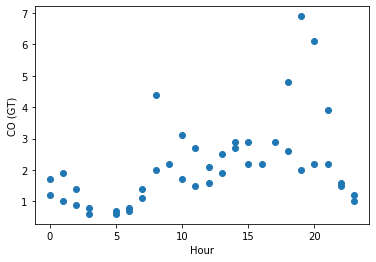

In [7]:
filename = 'AirQualityUCI.csv'
data = pandas.read_csv(filename, delimiter=';', decimal=',',
                       usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']]
data = data[:46] # only use the first 46 samples
data = data.dropna(axis=0)

hour = np.array([int(t[:2]) for t in data['Time']])
CO = np.array(data['CO(GT)'])

T = CO.reshape(-1,1)
Tnames = ['CO (GT)']
X = hour.reshape(-1,1)
Xnames = ['Hour']
print('X.shape =', X.shape, 'Xnames =', Xnames)
print('T.shape =', T.shape, 'Tnames =', Tnames)
plt.plot(X, T, 'o')
plt.xlabel(Xnames[0])
plt.ylabel(Tnames[0])

## 3. Use the `gradient_descent_adam` function to find the best weights for the linear model.

In [8]:
def gradient_descent_adam(model_f, gradient_f, rmse_f, 
                          X, T, W, rho, n_steps):
    # Commonly used parameter values
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m = 0
    v = 0
    
    error_sequence = []
    W_sequence = []
    
    for step in range(n_steps):
        error_sequence.append(rmse_f(model_f, X, T, W))
        W_sequence.append(W.flatten())
        
        g = gradient_f(X, T, W)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g * g
        mhat = m / (1 - beta1 ** (step+1))
        vhat = v / (1 - beta2 ** (step+1))
        W -= rho * mhat / (np.sqrt(vhat) + epsilon)
        
    return W, error_sequence, W_sequence

def rmse(model, X, T, W):
    Y = model(X, W)
    return np.sqrt(np.mean((T - Y)**2))

### A) Linear Model Tests

Linear RMSE:
   Rho: 1e-10  RMSE: 1.594413
   Rho: 1e-08  RMSE: 1.594297
   Rho: 1e-06  RMSE: 1.582756
   Rho: 0.0001  RMSE: 1.141051
   Rho: 0.01  RMSE: 1.100504
   Rho: 0.1  RMSE: 1.100504


Text(0, 0.5, 'CO (GT)')

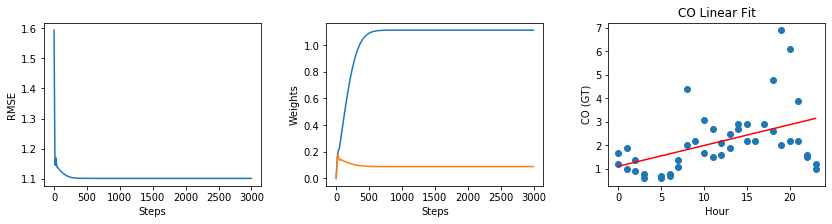

In [9]:
n_tests = 6
rho = [1.e-10, 1.e-8, 1.e-6, 1.e-4, 1.e-2, 1.e-1]
n_steps = 3000
print(f'Linear RMSE:')

err_save = 999.
for i in range(n_tests):
   W = np.zeros((2,1))
   W, err_seq, W_seq = gradient_descent_adam(
        linear_model, linear_model_gradient, rmse,
        X, T, W, rho[i], n_steps)
   if (np.sqrt(err_seq[-1]) < err_save):
        err_save = np.sqrt(err_seq[-1])
        W_save = W.copy()
        err_seq_save = err_seq.copy()
        W_seq_save = W_seq.copy()
   print(f'   Rho: {rho[i]}  RMSE: {np.sqrt(err_seq[-1]):4f}')
    
plt.figure(figsize=(14, 3))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1, 3, 1)
plt.plot(np.sqrt(err_seq_save))
plt.xlabel("Steps")
plt.ylabel("RMSE")
plt.subplot(1, 3, 2)
plt.plot(W_seq_save)
plt.xlabel("Steps")
plt.ylabel("Weights")
plt.subplot(1, 3, 3)
plt.plot(X, T, 'o')
xs = np.linspace(0, 23, 100).reshape((-1, 1))
plt.plot(xs, linear_model(xs, W_save), 'r')
plt.title("CO Linear Fit")
plt.xlabel("Hour")
plt.ylabel("CO (GT)")

For the linear model, the root-mean-square-errors (RMSE) continued to decrease with increasing learning rates between 1e-10 to 1e-2.  The minimum RMSE was 1.1005.

### B) Quadratic Model Tests

In [10]:
n_tests = 6
rho = [1.e-10, 1.e-8, 1.e-6, 1.e-4, 1.e-2, 1.e-1]
n_steps = 3000
print(f'Quadratic RMSE:')

err_save = 999.
for i in range(n_tests):
   W = np.zeros((3,1))
   W, err_seq, W_seq = gradient_descent_adam(
        quadratic_model, quadratic_model_gradient, rmse,
        X, T, W, rho[i], n_steps)
   if (np.sqrt(err_seq[-1]) < err_save):
        err_save = np.sqrt(err_seq[-1])
        W_save = W.copy()
        err_seq_save = err_seq.copy()
        W_seq_save = W_seq.copy()
   print(f'   Rho: {rho[i]}  RMSE: {np.sqrt(err_seq[-1]):4f}')
    
plt.figure(figsize=(14, 3))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1, 3, 1)
plt.plot(np.sqrt(err_seq_save))
plt.xlabel("Steps")
plt.ylabel("RMSE")
plt.subplot(1, 3, 2)
plt.plot(W_seq_save)
plt.xlabel("Steps")
plt.ylabel("Weights")
plt.subplot(1, 3, 3)
plt.plot(X, T, 'o')
xs = np.linspace(0, 23, 100).reshape((-1, 1))
plt.plot(xs, quadratic_model(xs, W_save), 'r')
plt.title("CO Quadratic Fit")
plt.xlabel("Hour")
plt.ylabel("CO (GT)")

Quadratic RMSE:
   Rho: 1e-10  RMSE: 1.594395
   Rho: 1e-08  RMSE: 1.592491
   Rho: 1e-06  RMSE: 1.424873
   Rho: 0.0001  RMSE: 1.122365
   Rho: 0.01  RMSE: 1.087891
   Rho: 0.1  RMSE: 1.087891


Text(0, 0.5, 'CO (GT)')

Similar to the linear case, using the quadratic model the RMSE decreases with increasing learning rates until 1e-2 where it plateaus.  The minimum RMSE is slightly lower than that for the linear model, with a value of 1.088 GT.

### C) Cubic Model Tests

Cubic RMSE:
   Rho: 1e-10  RMSE: 1.594072
   Rho: 1e-08  RMSE: 1.561209
   Rho: 1e-06  RMSE: 1.339684
   Rho: 0.0001  RMSE: 1.070287
   Rho: 0.01  RMSE: 1.041434
   Rho: 0.1  RMSE: 1.041589


Text(0, 0.5, 'CO (GT)')

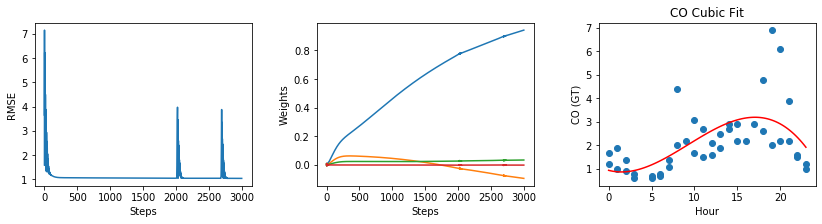

In [11]:
n_tests = 6
rho = [1.e-10, 1.e-8, 1.e-6, 1.e-4, 1.e-2, 1.e-1]
n_steps = 3000
print(f'Cubic RMSE:')

err_save = 999.
for i in range(n_tests):
   W = np.zeros((4,1))
   W, err_seq, W_seq = gradient_descent_adam(
        cubic_model, cubic_model_gradient, rmse,
        X, T, W, rho[i], n_steps)
   if (np.sqrt(err_seq[-1]) < err_save):
        err_save = np.sqrt(err_seq[-1])
        W_save = W.copy()
        err_seq_save = err_seq.copy()
        W_seq_save = W_seq.copy()
   print(f'   Rho: {rho[i]}  RMSE: {np.sqrt(err_seq[-1]):4f}')
    
plt.figure(figsize=(14, 3))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1, 3, 1)
plt.plot(np.sqrt(err_seq_save))
plt.xlabel("Steps")
plt.ylabel("RMSE")
plt.subplot(1, 3, 2)
plt.plot(W_seq_save)
plt.xlabel("Steps")
plt.ylabel("Weights")
plt.subplot(1, 3, 3)
plt.plot(X, T, 'o')
xs = np.linspace(0, 23, 100).reshape((-1, 1))
plt.plot(xs, cubic_model(xs, W_save), 'r')
plt.title("CO Cubic Fit")
plt.xlabel("Hour")
plt.ylabel("CO (GT)")

For the cubic model, the RMSE decreases with increasing learning rates to 1.e-2, where it has a minimum RMSE of 1.0414.  Rather than staying constant, the RMSE actually increases for a learning rate of 1.e-1.  

Interestingly, I got an RMSE of 1.02 when I did not reset the weights to 0 between each test, indicating that the algorithm is sensitive to the initial values.  Upon discovering this, I then changed the number of steps to 5000 but found that with resetting the initial weights to 0 even increasing the number of steps did not decrease the RMSE as much as using different starting weights.  This indicates to me that the algorithm is more sensitive to starting choice of weights than the number of steps. 

### D) Quartic Model Tests

In [12]:
n_tests = 9
rho = [1.e-10, 1.e-8, 1.e-7, 1.e-6, 1.e-5, 1.e-4, 1.e-3, 1.e-2, 1.e-1]
n_steps = 3000
print(f'Quartic RMSE:')

err_save = 999.
for i in range(n_tests):
   W = np.zeros((5,1))
   W = np.zeros((5,1))  #Reset W each iteration
   W, err_seq, W_seq = gradient_descent_adam(
        quartic_model, quartic_model_gradient, rmse,
        X, T, W, rho[i], n_steps)
   if (np.sqrt(err_seq[-1]) < err_save):
        err_save = np.sqrt(err_seq[-1])
        W_save = W.copy()
        err_seq_save = err_seq.copy()
        W_seq_save = W_seq.copy()
   print(f'   Rho: {rho[i]}  RMSE: {np.sqrt(err_seq[-1]):4f}')
    
plt.figure(figsize=(14, 3))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1, 3, 1)
plt.plot(np.sqrt(err_seq_save))
plt.xlabel("Steps")
plt.ylabel("RMSE")
plt.subplot(1, 3, 2)
plt.plot(W_seq_save)
plt.xlabel("Steps")
plt.ylabel("Weights")
plt.subplot(1, 3, 3)
plt.plot(X, T, 'o')
xs = np.linspace(0, 23, 100).reshape((-1, 1))
#plt.plot(X, quartic_model(X, W_save), 'ro', markersize=4)
plt.plot(xs, quartic_model(xs, W_save), 'r')
plt.title("CO Quartic Fit")
plt.xlabel("Hour")
plt.ylabel("CO (GT)")

Quartic RMSE:
   Rho: 1e-10  RMSE: 1.588089
   Rho: 1e-08  RMSE: 1.413977
   Rho: 1e-07  RMSE: 1.381906
   Rho: 1e-06  RMSE: 1.116928
   Rho: 1e-05  RMSE: 1.087169
   Rho: 0.0001  RMSE: 1.751385
   Rho: 0.001  RMSE: 1.054535
   Rho: 0.01  RMSE: 1.054535
   Rho: 0.1  RMSE: 1.102382


Text(0, 0.5, 'CO (GT)')

The RMSE for the quartic model is minimal at the learning rate of 1.e-3 with an RMSE of 1.0545.  The error is the same for a learning rate of 1.e-2 and increases for 1.e-1.

##### Looking across models, the cubic model yields the best fit in this case with the lowest RMSE.
I also tried using all the data and this conclusion held, although the RMSEs were lower for all models.